# Tutorial on `slr`, the Sea Level Rise Python Package

## Purpose
This simple tutorial is meant to cover 90% of cases where simple Sea Level Rise (SLR) figures are needed for engineering applications.

## Assumptions
This tutorial assumes that you were able to install the package, either directly from git or from the cloned repo on your local disk.

## Settings

In [1]:
import slr
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
reload(slr)

<module 'slr' from 'c:\\users\\jnot\\git\\02 applications\\slr\\src\\slr\\__init__.py'>

## Display All Available Locations
Here we want to display all locations where SLR information is available.

## Load a Set of SLRProjections
Let's assume we'd like to work with a project site located next to North Spit, CA. Let's load all available information for that location using the following command:

In [2]:
ns = slr.SLRProjections.from_location(
    location='North Spit, CA'
)

The projections can easily be loaded and displayed in a familiar format:

It is possible that depending on project requirements or client preferences, specific units be desired. For that, the `.convert` method can be invoked:

In [3]:
ns

Sea level rise Projections for North Spit, CA issued by California OPC 2018; there are 3 Scenario(s) available.

<AxesSubplot:title={'center':'SLR for North Spit, CA'}, ylabel='SLR [ft]'>

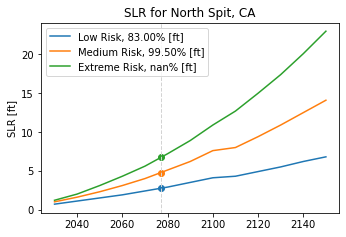

In [3]:
ns.plot(horizon_year=2027 + 50)

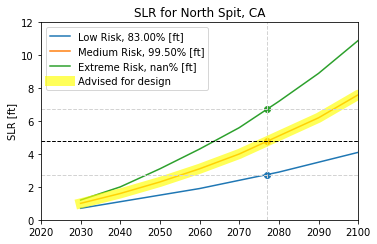

In [34]:
horiz_year = 2027 + 50
# Display a base figure using the builtin method
ax = ns.plot(horizon_year=horiz_year)

# Highlight the specific Scenario item retained for design
ax.plot(ns[1].data.x, ns[1].data.y, c='yellow', label='Advised for design', lw=10, alpha=.65)

# Use the builtin class method to estimate SLR by the horizon year
ax.axhline(y=ns[0].by_horizon_year(horizon_year=horiz_year), c='lightgrey', ls='--', lw=1)
ax.axhline(y=ns[1].by_horizon_year(horizon_year=horiz_year), c='k', ls='--', lw=1)
ax.axhline(y=ns[2].by_horizon_year(horizon_year=horiz_year), c='lightgrey', ls='--', lw=1)

# Adjust the time and projection axis ranges
ax.set_xlim([2020, 2100])
ax.set_ylim([0, 12])

# Update the legend
plt.legend()
plt.tight_layout()

plt.savefig('projections.png')

In [36]:
ns.by_horizon_year(horizon_year=horiz_year, merge=False)

Low Risk        2.75
Medium Risk     4.77
Extreme Risk    6.72
Name: SLR at North Spit, CA by 2077 [ft], dtype: float64

In [7]:
# Grab the value by a certain date, and display as a probability distribution;
# useful when discussing probabilities with SLR projections.
# Rarely useful in practice!
dist_val = dict()
for scenario_ in ns.scenarios:
    dist_val[scenario_.short_name] = {   
        "value" : scenario_.by_horizon_year(horizon_year=horiz_year),
        "units" : scenario_.units,
        "CDF" : scenario_.probability
    }
df_dist = (
    pd.DataFrame.from_dict(data=dist_val, orient='index')
    .rename_axis(f'by {horiz_year}', axis=1)
)

In [9]:
hslr = slr.HistoricalSLR(station_ID=ns.station_ID, units='ft')

In [29]:
pd.DataFrame.from_dict(
    data=hslr._data,
    orient='index'
)

,0
stationId,9418767
stationName,"North Spit, CA"
affil,US
latitude,40.7663
longitude,-124.2172
trend,4.91
trendError,0.43
units,mm/yr
startDate,09/15/1977
endDate,12/15/2020
